<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-22 02:02:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  60.8MB/s    in 3.3s    

2025-09-22 02:02:42 (60.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [11]:
df = pd.read_sql_query("SELECT * FROM main;", conn)
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


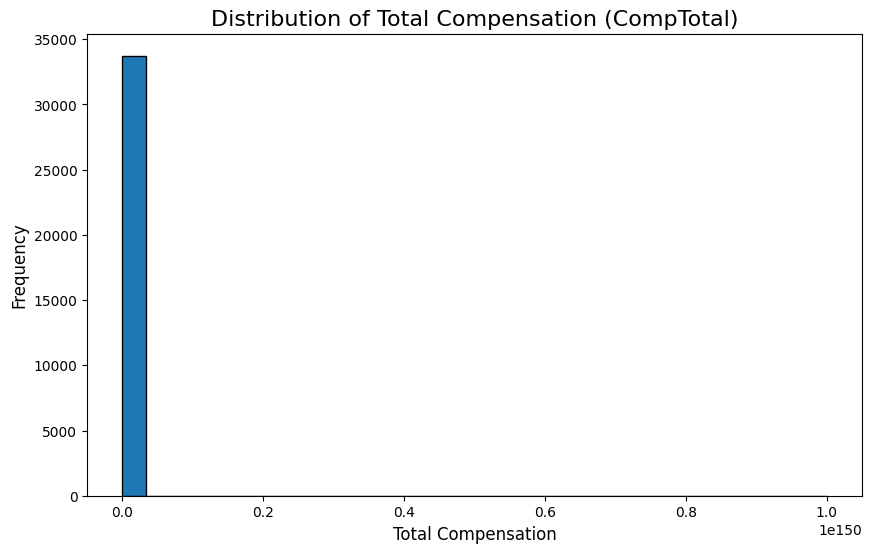

In [12]:

plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'].dropna(), bins=30, edgecolor='black')

plt.title("Distribution of Total Compensation (CompTotal)", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


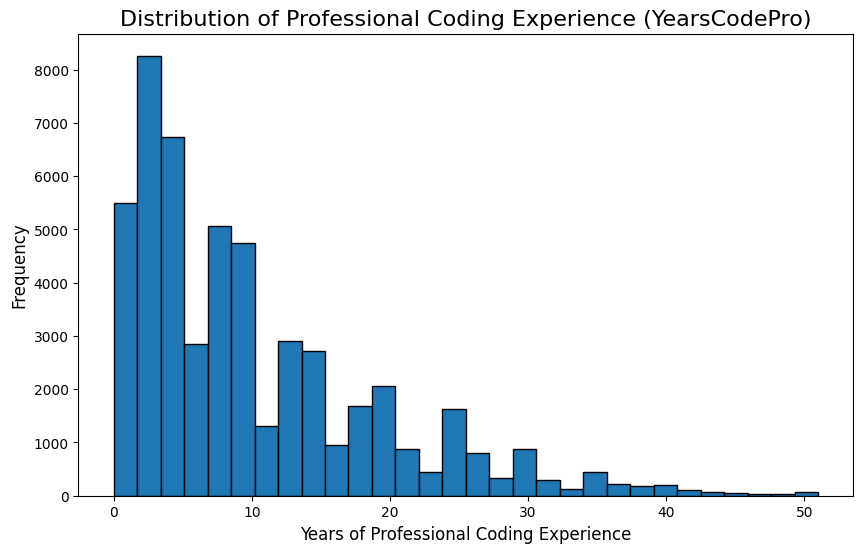

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace categories with numeric midpoints
num_mapping = {
    'Less than 1 year': 0,
    'More than 50 years': 51
}

# Convert YearsCodePro: use mapping, or convert numeric strings to int
df['YearsCodePro_num'] = df['YearsCodePro'].replace(num_mapping)
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro_num'], errors='coerce')

# Drop rows where conversion failed
df_clean = df.dropna(subset=['YearsCodePro_num'])

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_clean['YearsCodePro_num'], bins=30, edgecolor='black')

plt.title("Distribution of Professional Coding Experience (YearsCodePro)", fontsize=16)
plt.xlabel("Years of Professional Coding Experience", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


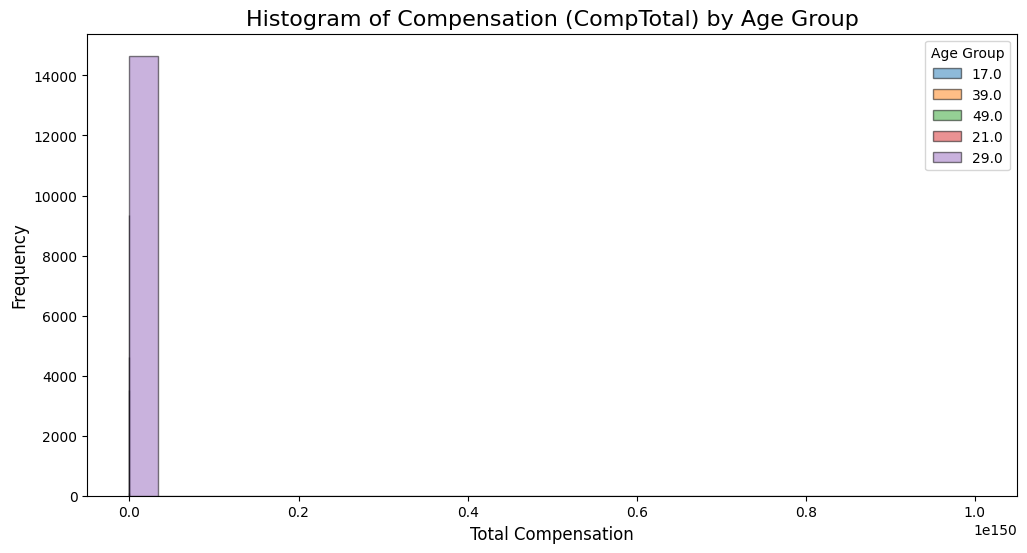

In [23]:
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}


# Replace categories with numeric midpoints
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where mapping didn’t apply (like "Prefer not to say")
df_clean = df.dropna(subset=['Age_numeric'])

plt.figure(figsize=(12,6))

# Loop through a few age groups (choose most common)
for age in df['Age_numeric'].dropna().unique()[:5]:  # limit to 5 groups
    subset = df[df['Age_numeric'] == age]['CompTotal'].dropna()
    plt.hist(subset, bins=30, alpha=0.5, label=str(age), edgecolor='black')

plt.title("Histogram of Compensation (CompTotal) by Age Group", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Age Group")
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


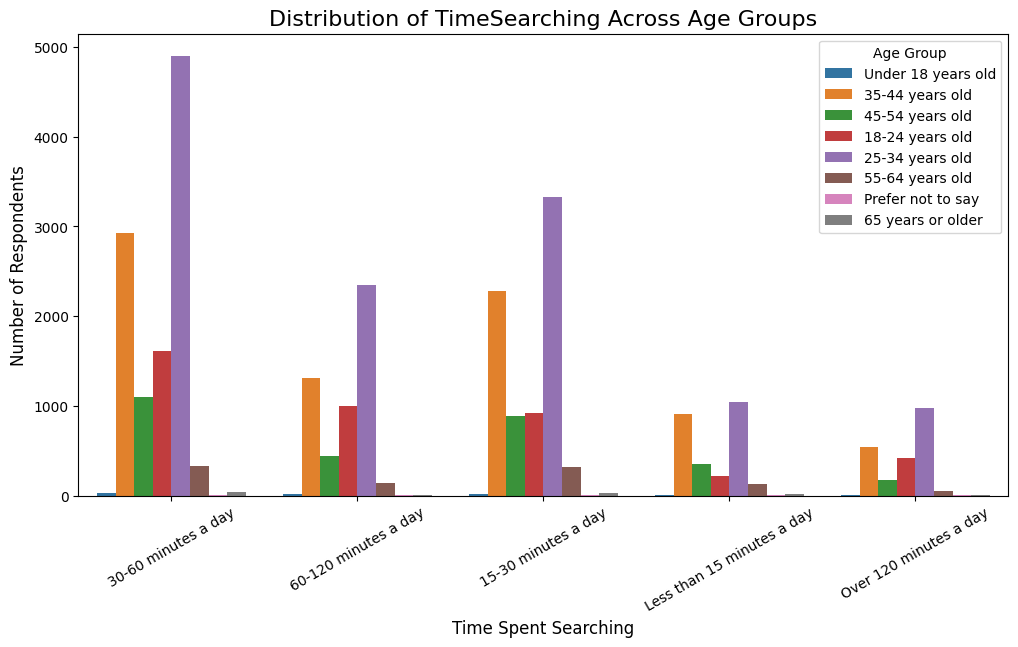

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="TimeSearching", hue="Age")

plt.title("Distribution of TimeSearching Across Age Groups", fontsize=16)
plt.xlabel("Time Spent Searching", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Age Group")
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


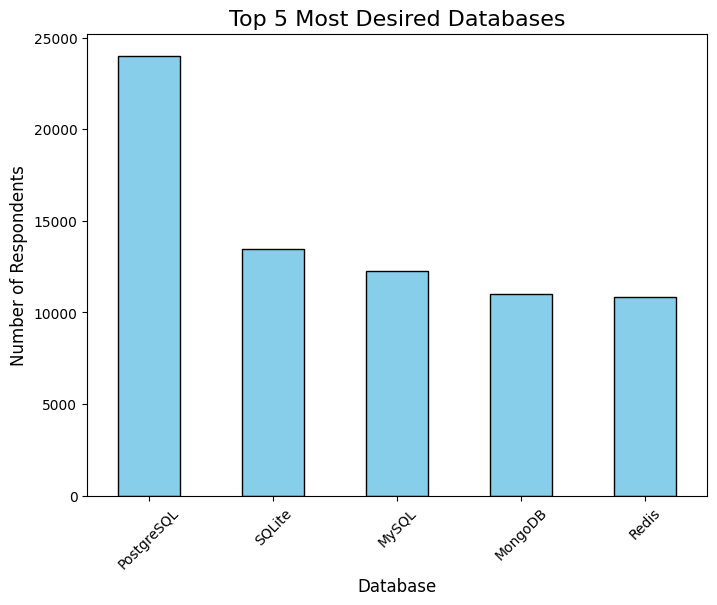

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split multiple databases into separate rows
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')
db_exploded = db_series.explode().str.strip()

# Step 2: Count frequency of each database
db_counts = db_exploded.value_counts().head(5)

# Step 3: Plot histogram (bar chart of counts)
plt.figure(figsize=(8,6))
db_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 5 Most Desired Databases", fontsize=16)
plt.xlabel("Database", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.show()



**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


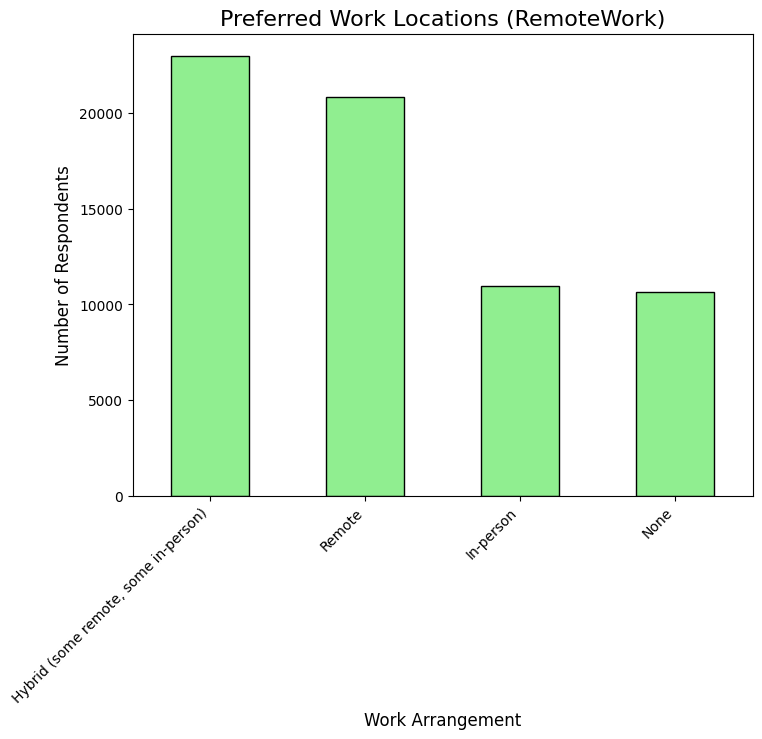

In [26]:
import matplotlib.pyplot as plt

# Step 1: Count the frequencies of RemoteWork responses
remote_counts = df['RemoteWork'].value_counts(dropna=False)

# Step 2: Plot histogram (bar chart)
plt.figure(figsize=(8,6))
remote_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Preferred Work Locations (RemoteWork)", fontsize=16)
plt.xlabel("Work Arrangement", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha="right")  # rotate labels for readability
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


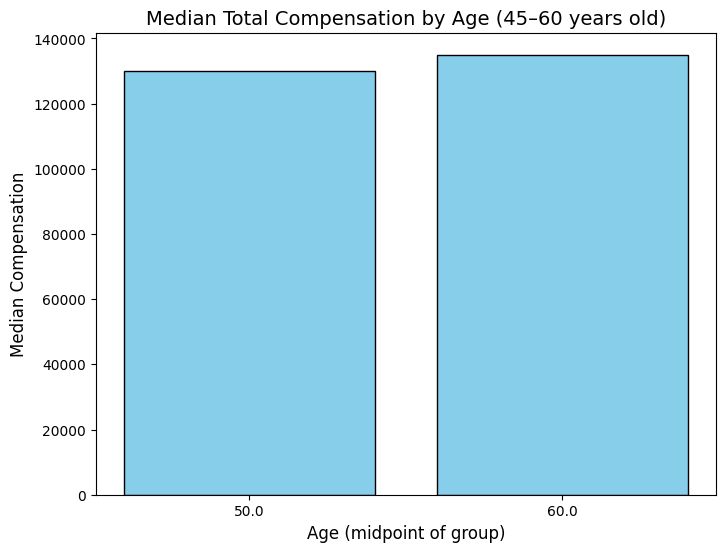

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Map age categories to numeric midpoints
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    "Prefer not to say": pd.NA
}

df['Age_numeric'] = df['Age'].map(age_map)
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')

# Drop missing CompTotal rows
df = df.dropna(subset=['CompTotal'])

# Group by age midpoint, compute median CompTotal
median_comp = df.groupby('Age_numeric')['CompTotal'].median()

# Filter ages 45–60
median_comp_45_60 = median_comp[(median_comp.index >= 45) & (median_comp.index <= 60)]

# Plot histogram-style bar chart
plt.figure(figsize=(8,6))
plt.bar(median_comp_45_60.index.astype(str), median_comp_45_60.values, color="skyblue", edgecolor="black")

plt.title("Median Total Compensation by Age (45–60 years old)", fontsize=14)
plt.xlabel("Age (midpoint of group)", fontsize=12)
plt.ylabel("Median Compensation", fontsize=12)
plt.show()



**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


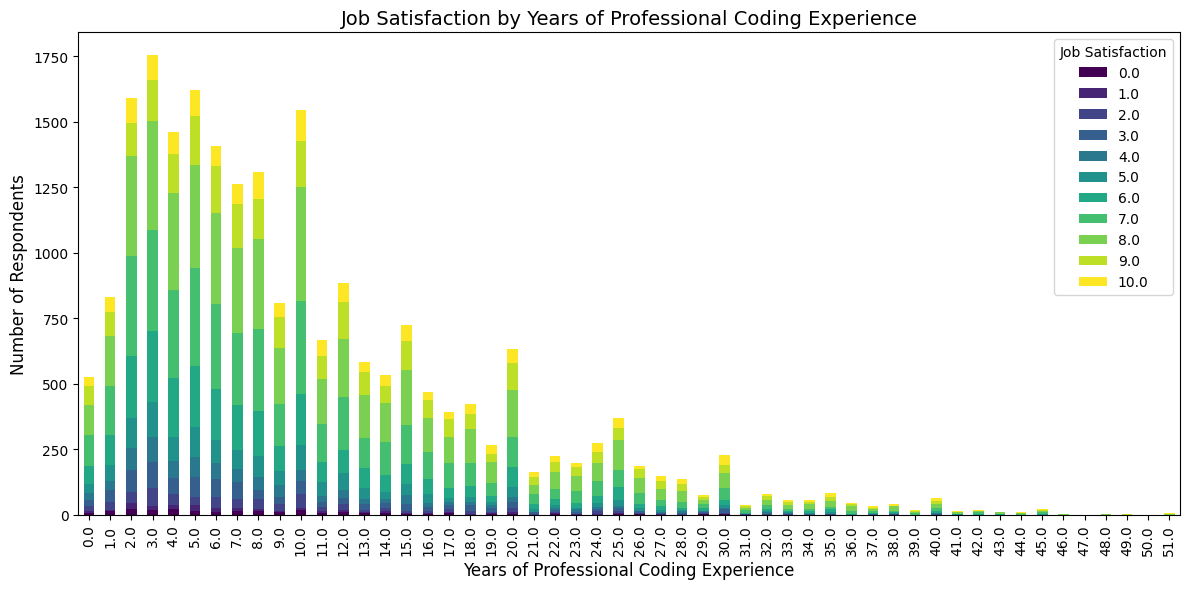

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Map YearsCodePro to numeric midpoints
years_map = {
    "Less than 1 year": 0,
    "More than 50 years": 51,
}
# Try to convert directly to numeric; use map for edge cases
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro'], errors="coerce")
df.loc[df['YearsCodePro'] == "Less than 1 year", 'YearsCodePro_num'] = 0
df.loc[df['YearsCodePro'] == "More than 50 years", 'YearsCodePro_num'] = 51

# Drop rows with missing JobSat or YearsCodePro_num
df_clean = df.dropna(subset=['YearsCodePro_num', 'JobSat'])

# Group by coding experience and JobSat, count responses
job_sat_counts = df_clean.groupby(['YearsCodePro_num', 'JobSat']).size().unstack(fill_value=0)

# Plot histogram (stacked bar chart)
job_sat_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap="viridis")

plt.title("Job Satisfaction by Years of Professional Coding Experience", fontsize=14)
plt.xlabel("Years of Professional Coding Experience", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.legend(title="Job Satisfaction")
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
